First 5 rows of the dataset:
   Temperature  Revenue
0         24.6      535
1         26.1      626
2         27.8      661
3         20.6      488
4         11.6      317

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None

Descriptive Statistics:
       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000


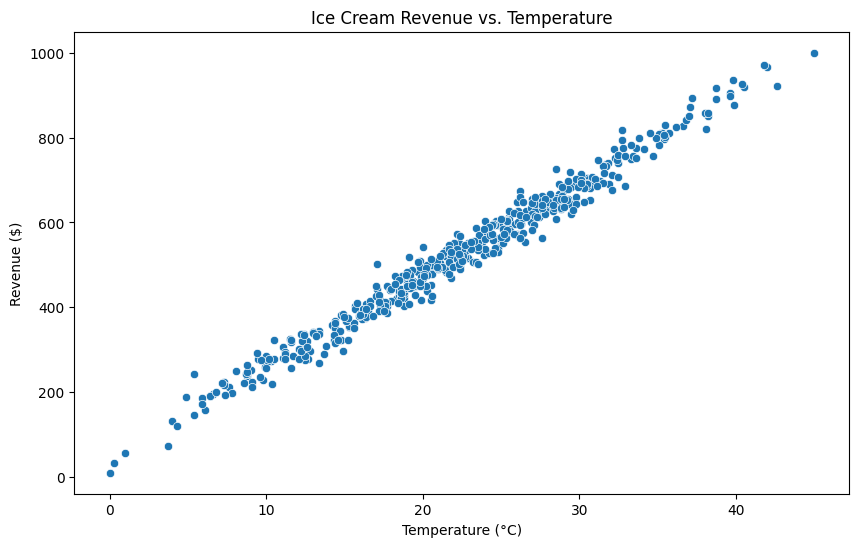

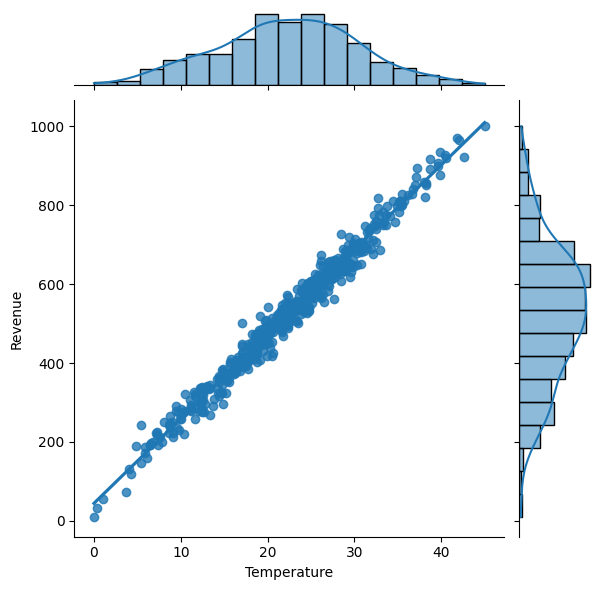


Shape of training and testing sets:
X_train shape: (400, 1)
X_test shape: (100, 1)
y_train shape: (400,)
y_test shape: (100,)

Linear Regression Model Parameters:
Intercept: 46.17834580774047
Coefficient (Slope): 21.384000731002768

Model Evaluation:
Mean Squared Error (MSE): 652.49
R-squared (R2) Score: 0.98


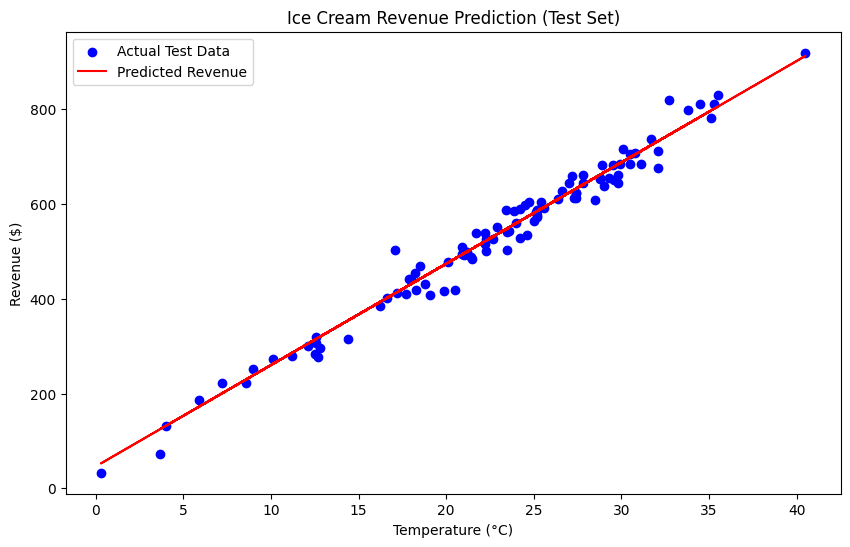


Predicted revenue for a temperature of 25°C: $580.78


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
#icecream_revenue_prediction

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
# You can use a public dataset from a URL, for example:
# If you have a local CSV file, you would use: df = pd.read_csv('your_file_name.csv')
url = 'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Ice%20Cream.csv'
df = pd.read_csv(url)
# Display the first 5 rows to check the data
print("First 5 rows of the dataset:")
print(df.head())
# Get a summary of the data
print("\nDataset Information:")
print(df.info())
# Get descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())
# Visualize the relationship between Temperature and Revenue
# A scatter plot is perfect for this.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Revenue', data=df)
plt.title('Ice Cream Revenue vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue ($)')
plt.show()
# You can also use a jointplot for more detailed visualization
sns.jointplot(x='Temperature', y='Revenue', data=df, kind='reg')
plt.show()
# Define features (X) and target (y)
X = df[['Temperature']] # Features should be in a 2D format, so use double brackets
y = df['Revenue']
# Split the data into training and testing sets
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nShape of training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
# Create a Linear Regression model
model = LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)
# Print the model's coefficients (slope and intercept)
print("\nLinear Regression Model Parameters:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (Slope): {model.coef_[0]}")
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
# Visualize the test set results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')
plt.plot(X_test,y_pred,color='red',label='Predicted Revenue')
plt.title('Ice Cream Revenue Prediction (Test Set)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue ($)')
plt.legend()
plt.show()

# Example: Predict revenue for a new temperature
new_temperature = np.array([[25]]) # Must be a 2D array
predicted_revenue = model.predict(new_temperature)
print(f"\nPredicted revenue for a temperature of 25°C: ${predicted_revenue[0]:.2f}")